In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [2]:
repouso = pd.read_csv('samples/repouso.csv')
repouso_mongo = pd.read_csv('samples/repouso_mongo.csv')
repouso_postgres = pd.read_csv('samples/repouso_postgres.csv')

mongo = pd.read_csv('samples/mongo.csv')
tempos_mongo = pd.read_csv('samples/tempos_mongo.csv', names=['start', 'finish'])

postgres = [pd.read_csv(f'samples/postgres{i}.csv') for i in range(1, 6)]
tempos_postgres = [pd.read_csv(f'samples/tempos_postgres{i}.csv', names=['start', 'finish']) for i in range(1, 6)]

In [3]:
duracao_mongo = tempos_mongo['finish'] - tempos_mongo['start']
#duracao_mongo


In [45]:
duracoes_postgres = [t['finish'] - t['start'] for t in tempos_postgres]
#duracoes_postgres

In [46]:
experimentos_mongo = tempos_mongo.apply(
    lambda row: mongo[(mongo['timestamp'] > row['start']) & (mongo['timestamp'] <= row['finish'] + 0.6)][:].reset_index(drop=True),
    axis=1
).tolist()
#experimentos_mongo[3].head()

In [6]:
experimentos_postgres = [
    t.apply(
    lambda row: p[(p['timestamp'] > row['start'] ) & (p['timestamp'] <= row['finish'] + 0.6)][:].reset_index(drop=True),
    axis=1
    )
    for t, p in zip(tempos_postgres, postgres)
]

In [7]:
uso_da_maquina = [{
    coluna: pd.DataFrame(
    {
        'repouso': repouso[coluna],
        'mongo em repouso': repouso_mongo[coluna],
        'mongo': consulta_mongo[coluna],
        'postgres em repouso': repouso_postgres[coluna],
        'postgres': experimentos_postgres[0][i][coluna],
        'postgres name btree': experimentos_postgres[1][i][coluna],
        'postgres ratings btree': experimentos_postgres[2][i][coluna],
        'postgres name hashtable': experimentos_postgres[3][i][coluna],
        'postgres ratings hashtable': experimentos_postgres[4][i][coluna]
    }
    )
    for coluna in consulta_mongo.columns

}
    for i, consulta_mongo in enumerate(experimentos_mongo)
    
]



In [8]:
uso_da_maquina[3]['disk_rb'].max()

repouso                       1.515400e+04
mongo em repouso              8.047833e+04
mongo                         5.970292e+07
postgres em repouso           4.849166e+06
postgres                      0.000000e+00
postgres name btree           4.420810e+05
postgres ratings btree        0.000000e+00
postgres name hashtable       4.451105e+05
postgres ratings hashtable    0.000000e+00
dtype: float64

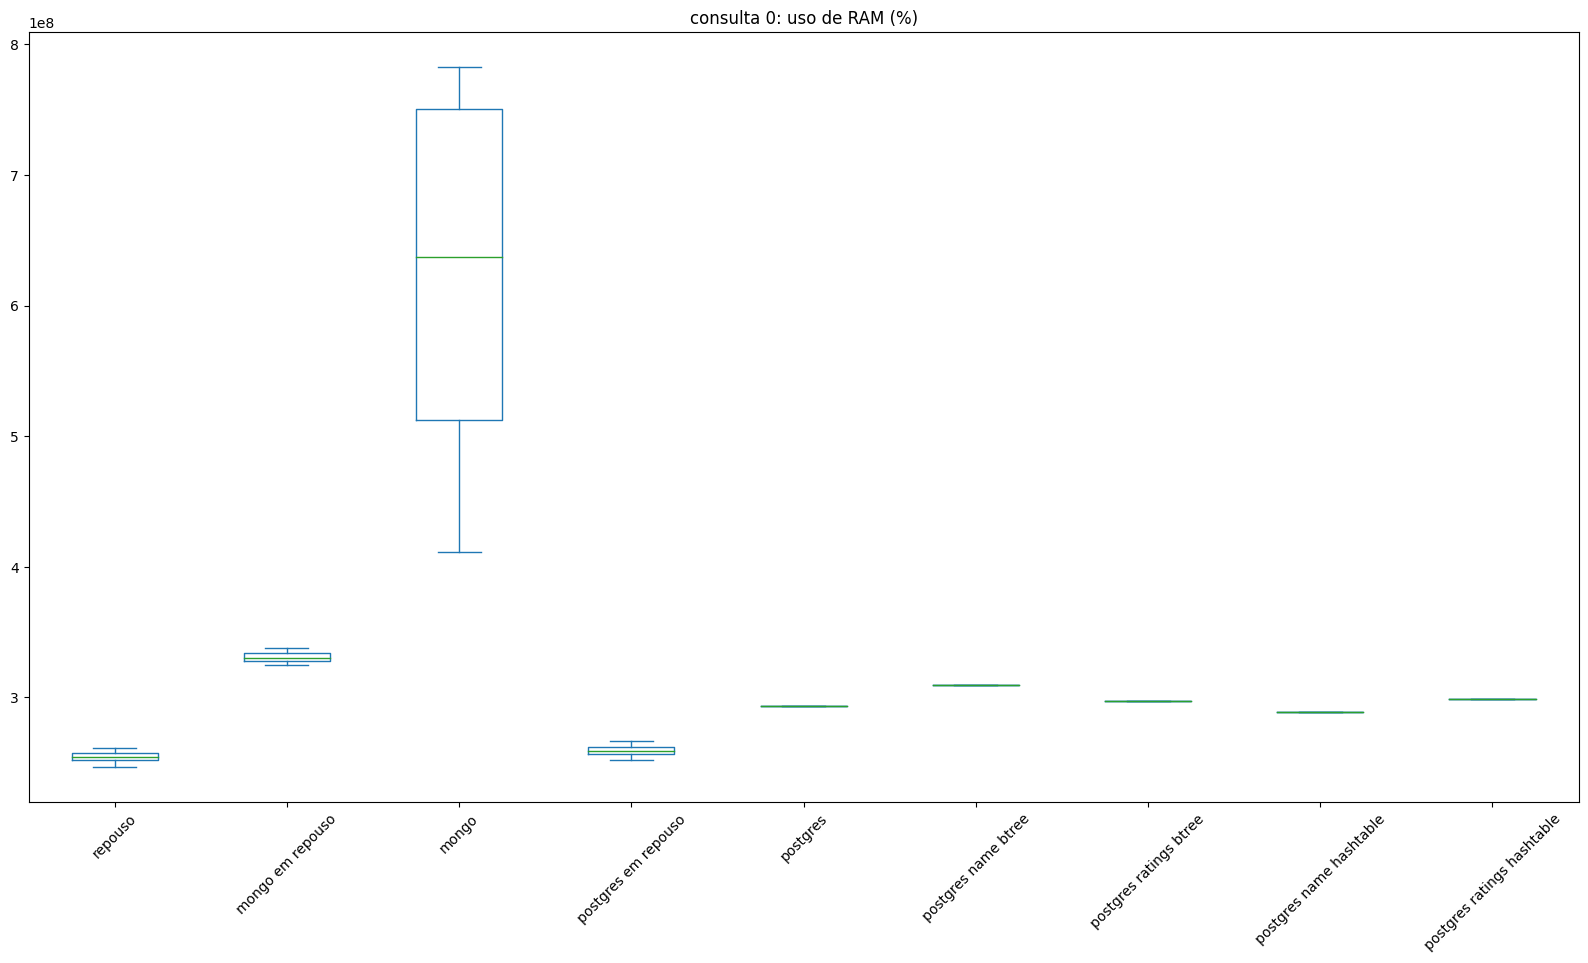

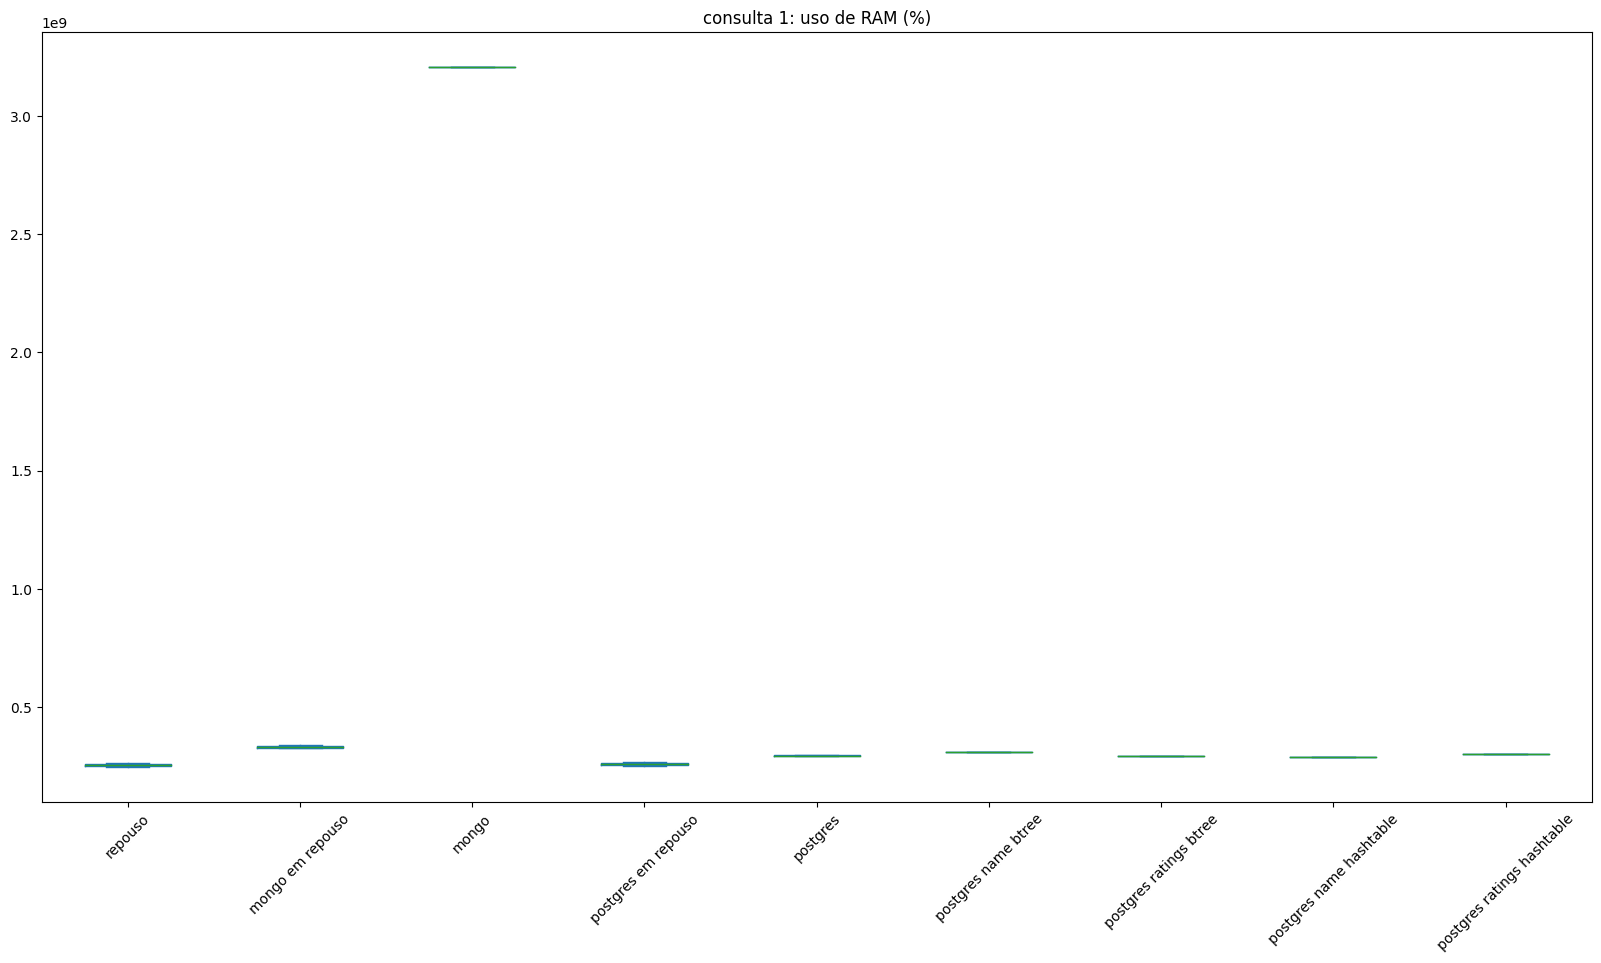

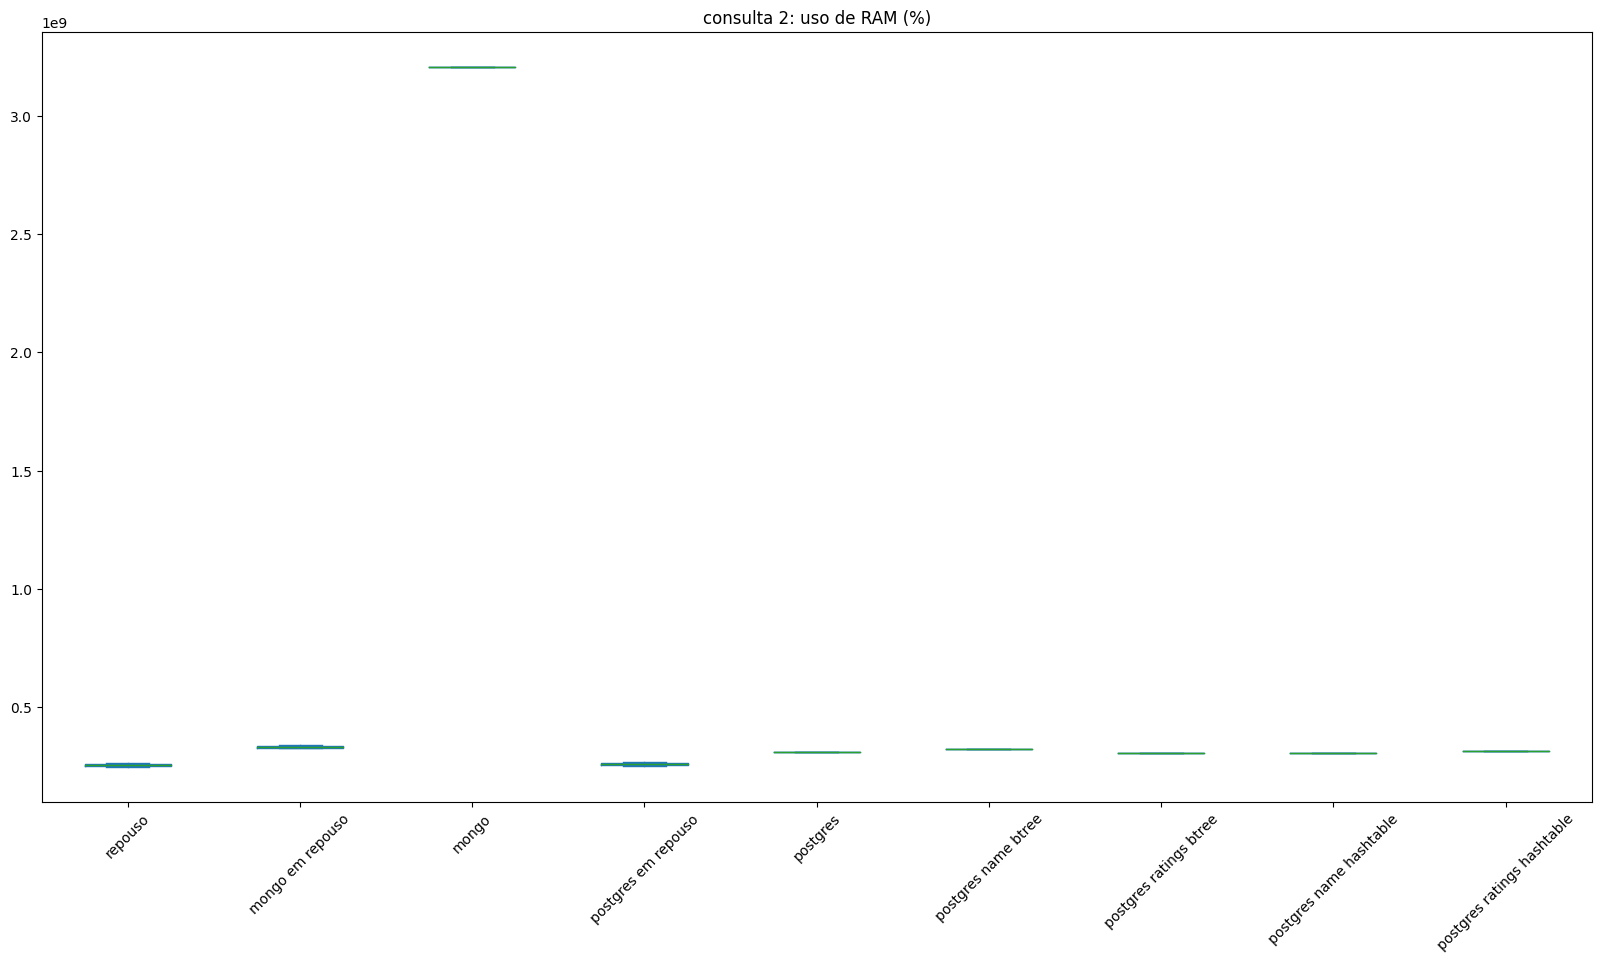

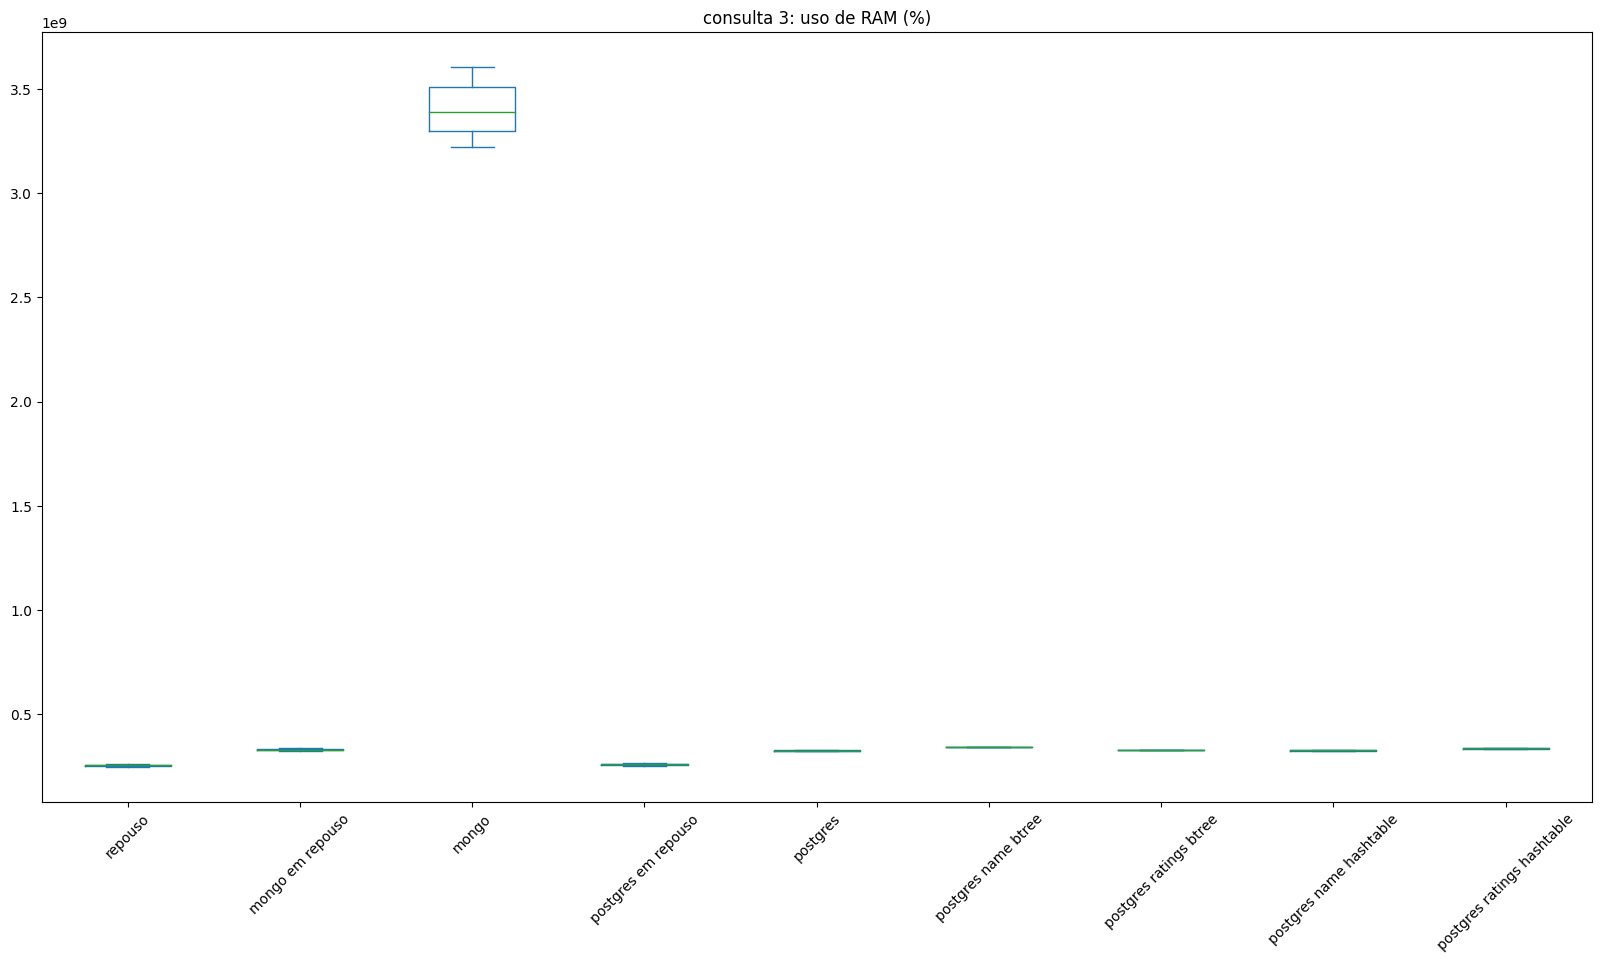

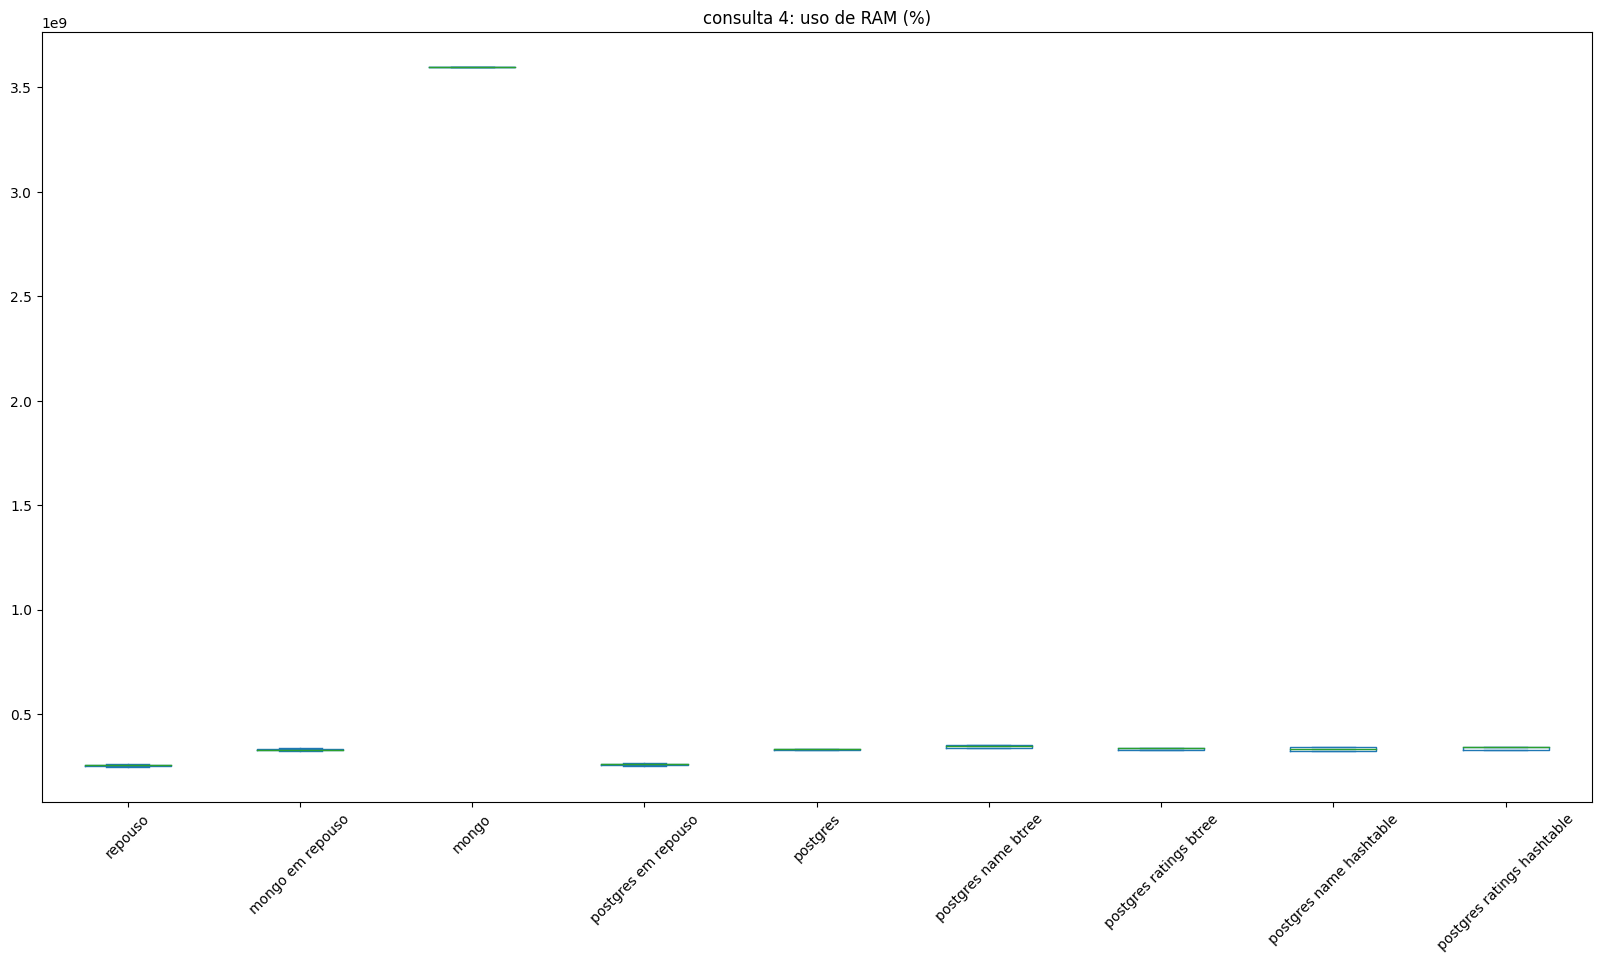

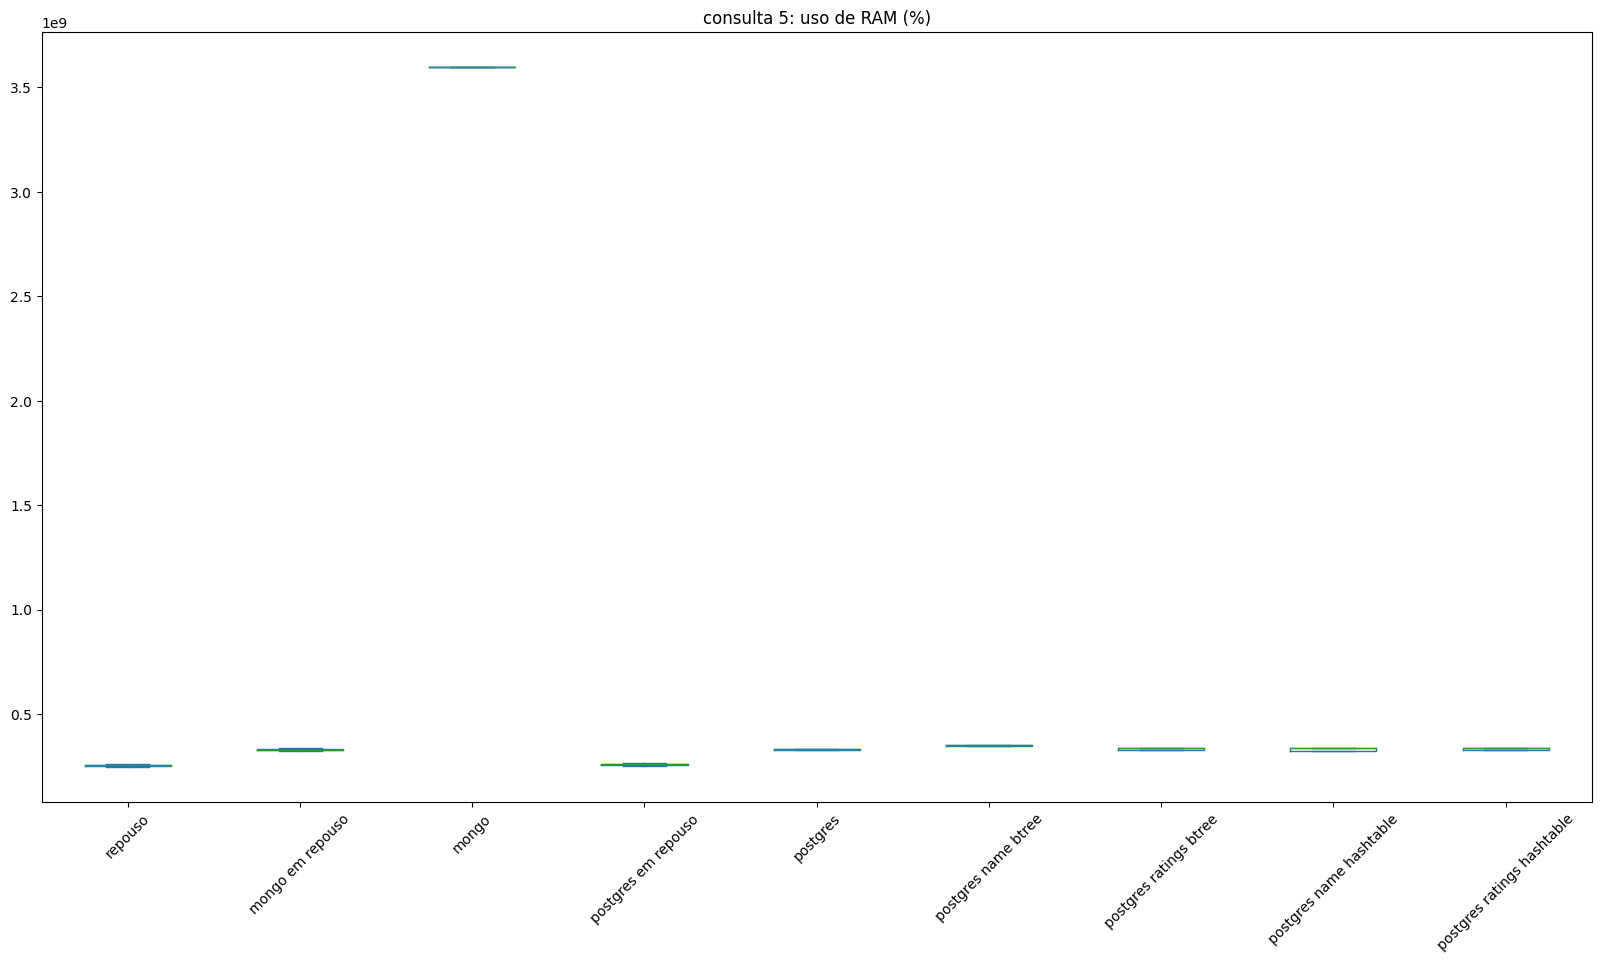

In [48]:
for i, consulta in enumerate(uso_da_maquina):
    uso_da_maquina[i]['usage'].plot.box(figsize=(20,10), showfliers=False)
    plt.xticks(rotation=45)
    plt.title(f'consulta {i}: uso de CPU (%)')
    plt.show()

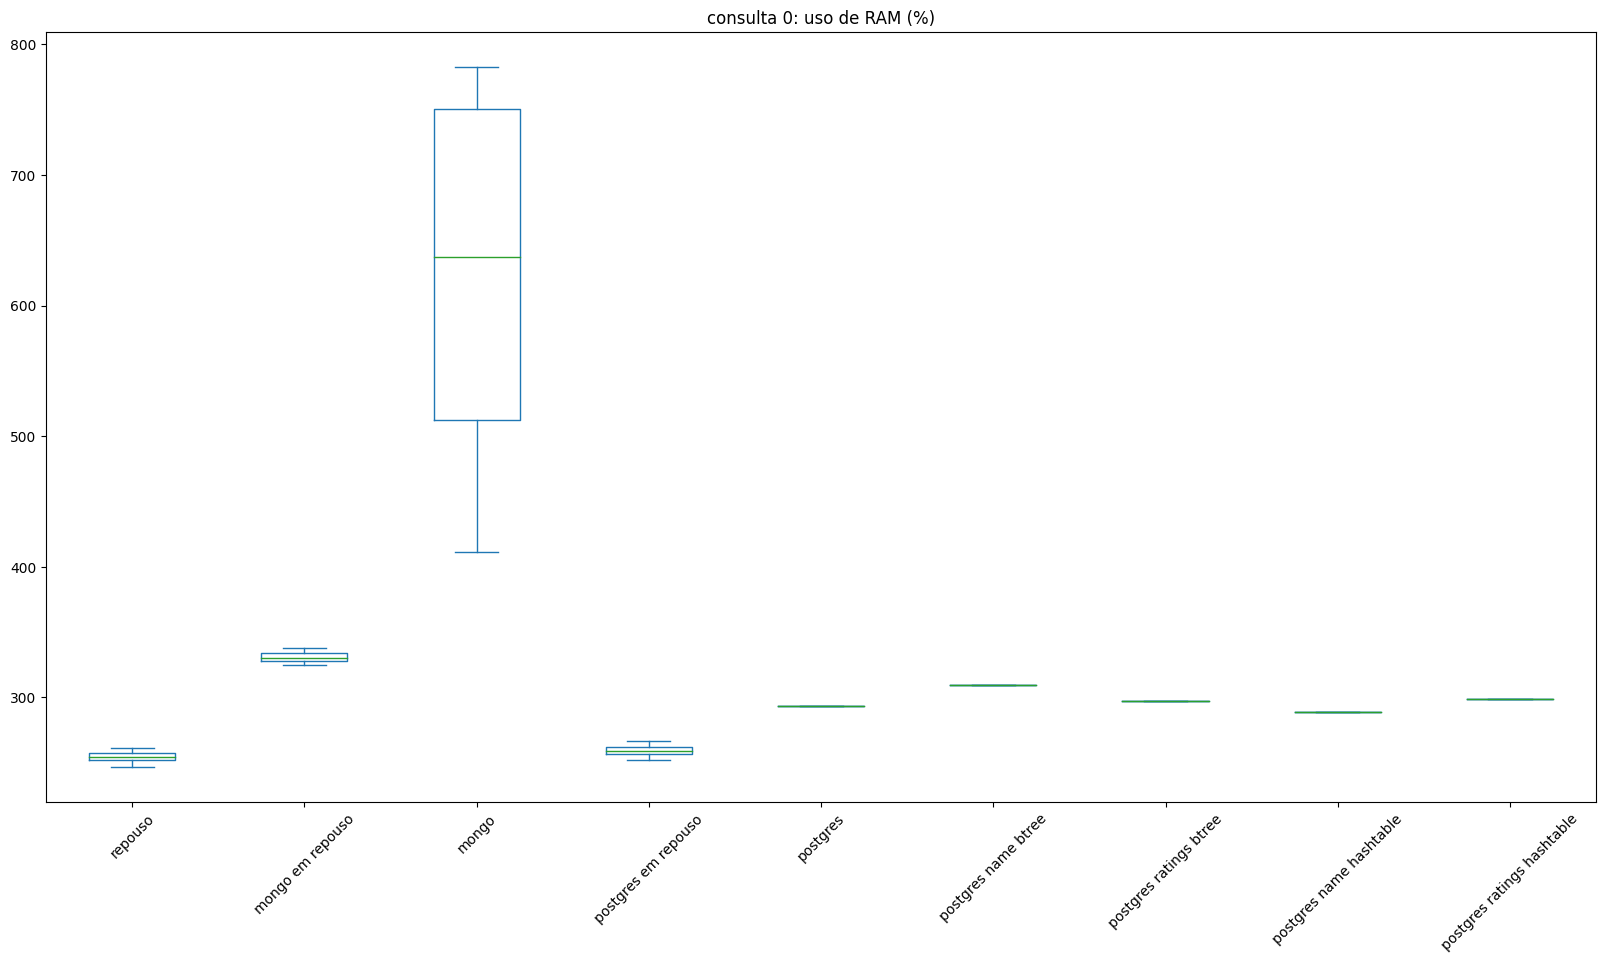

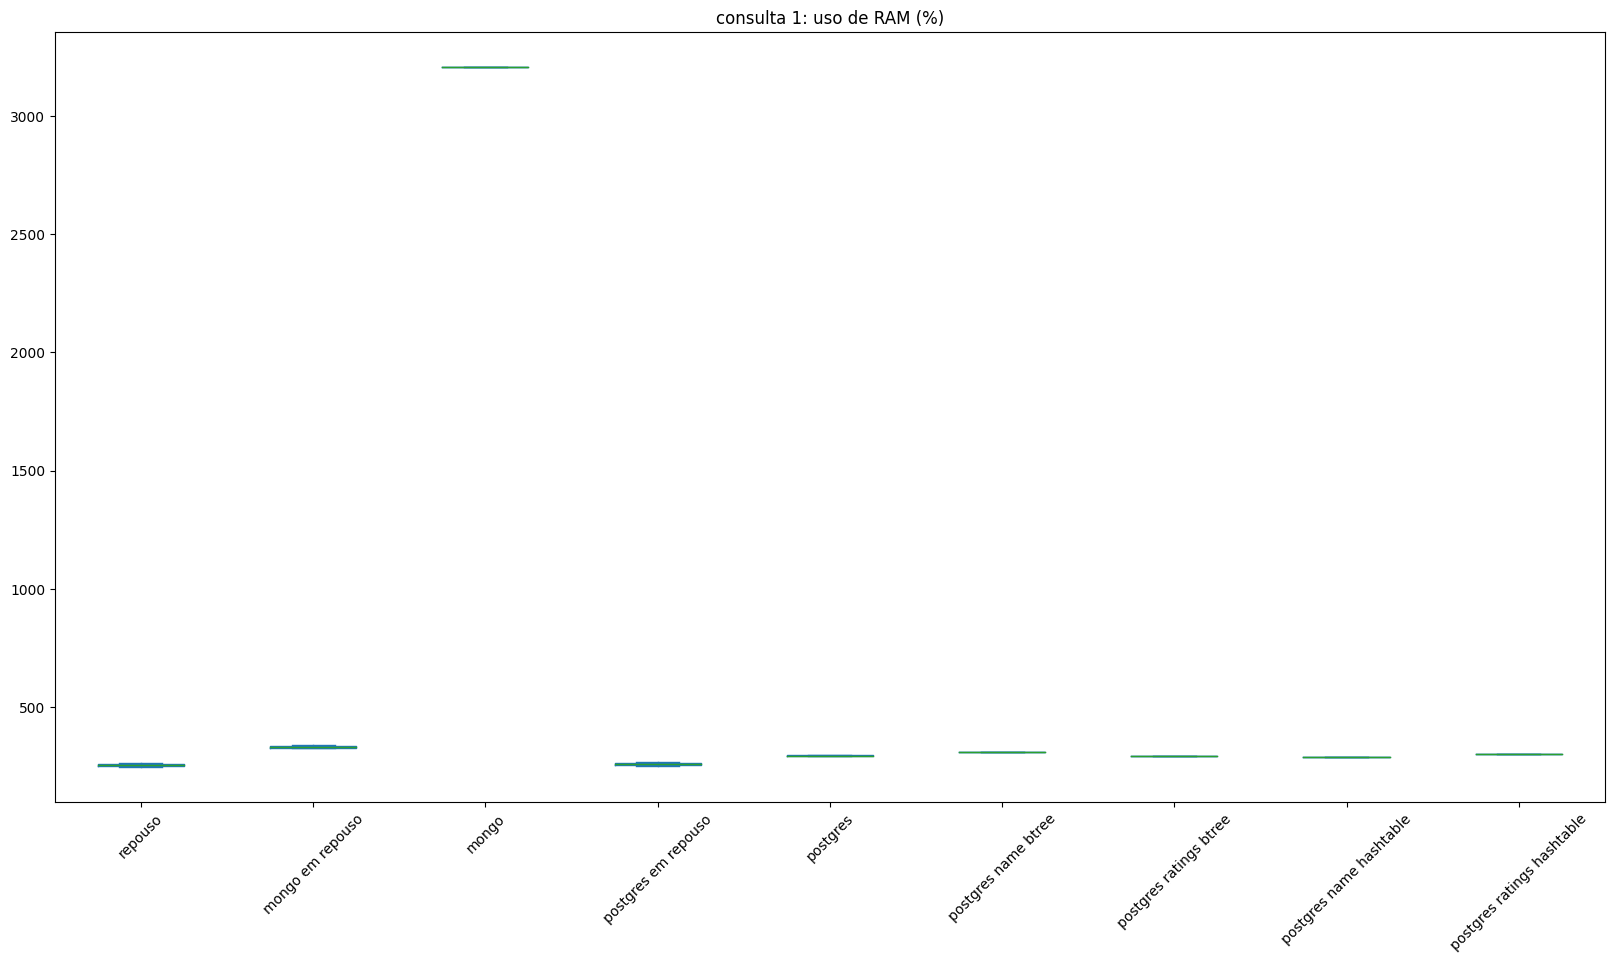

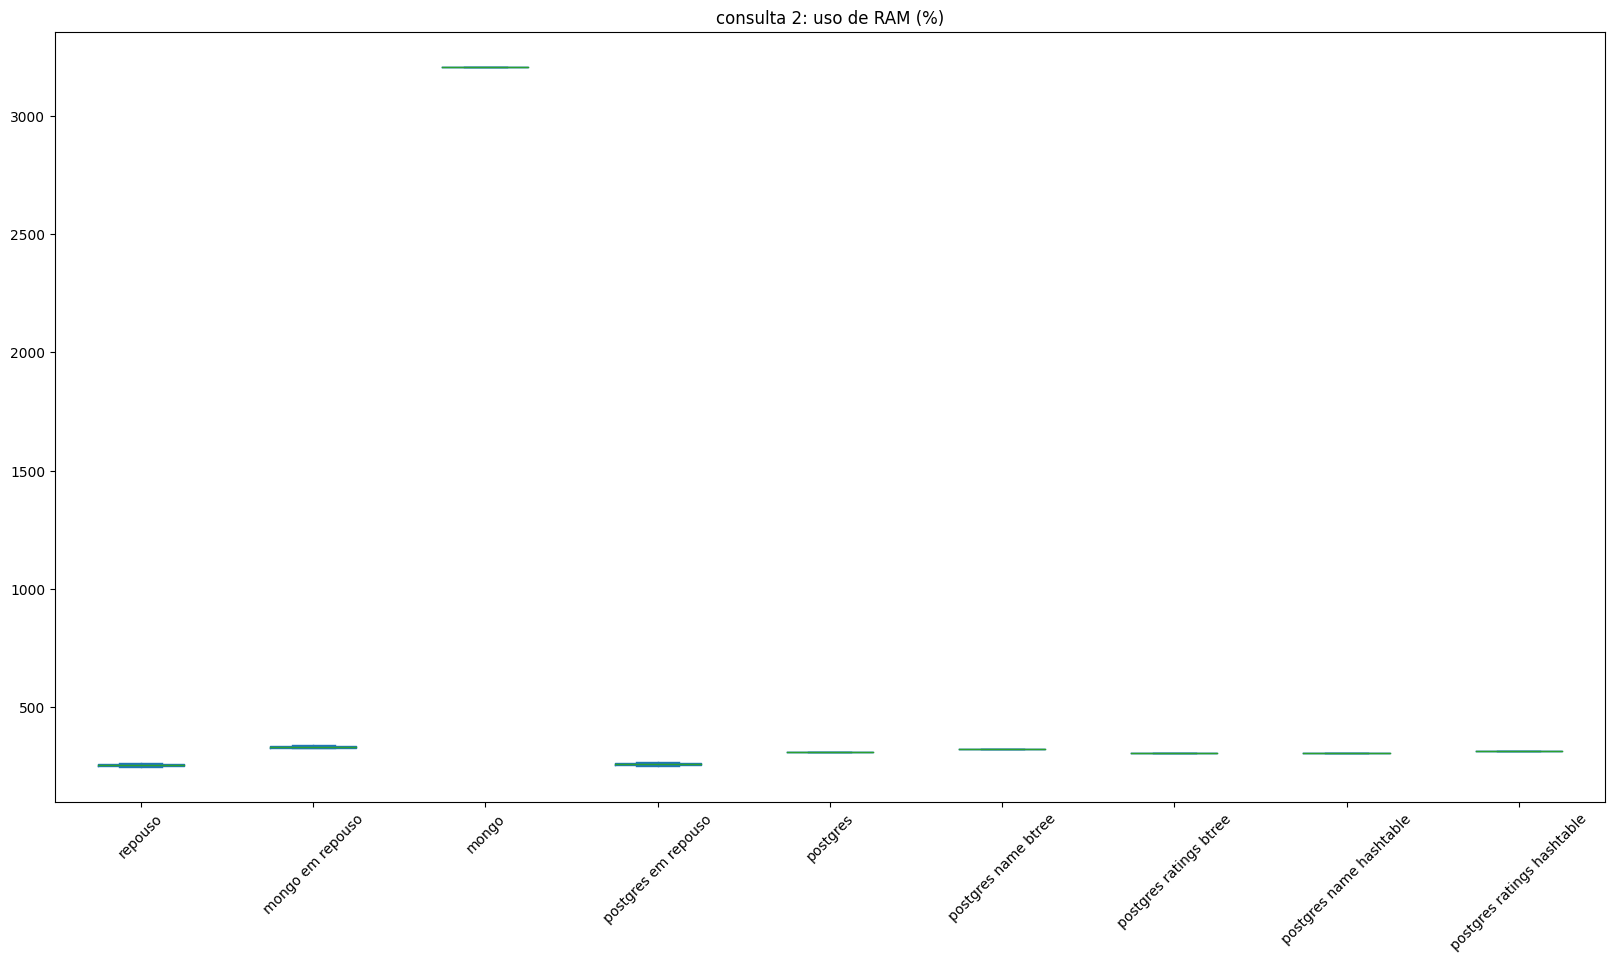

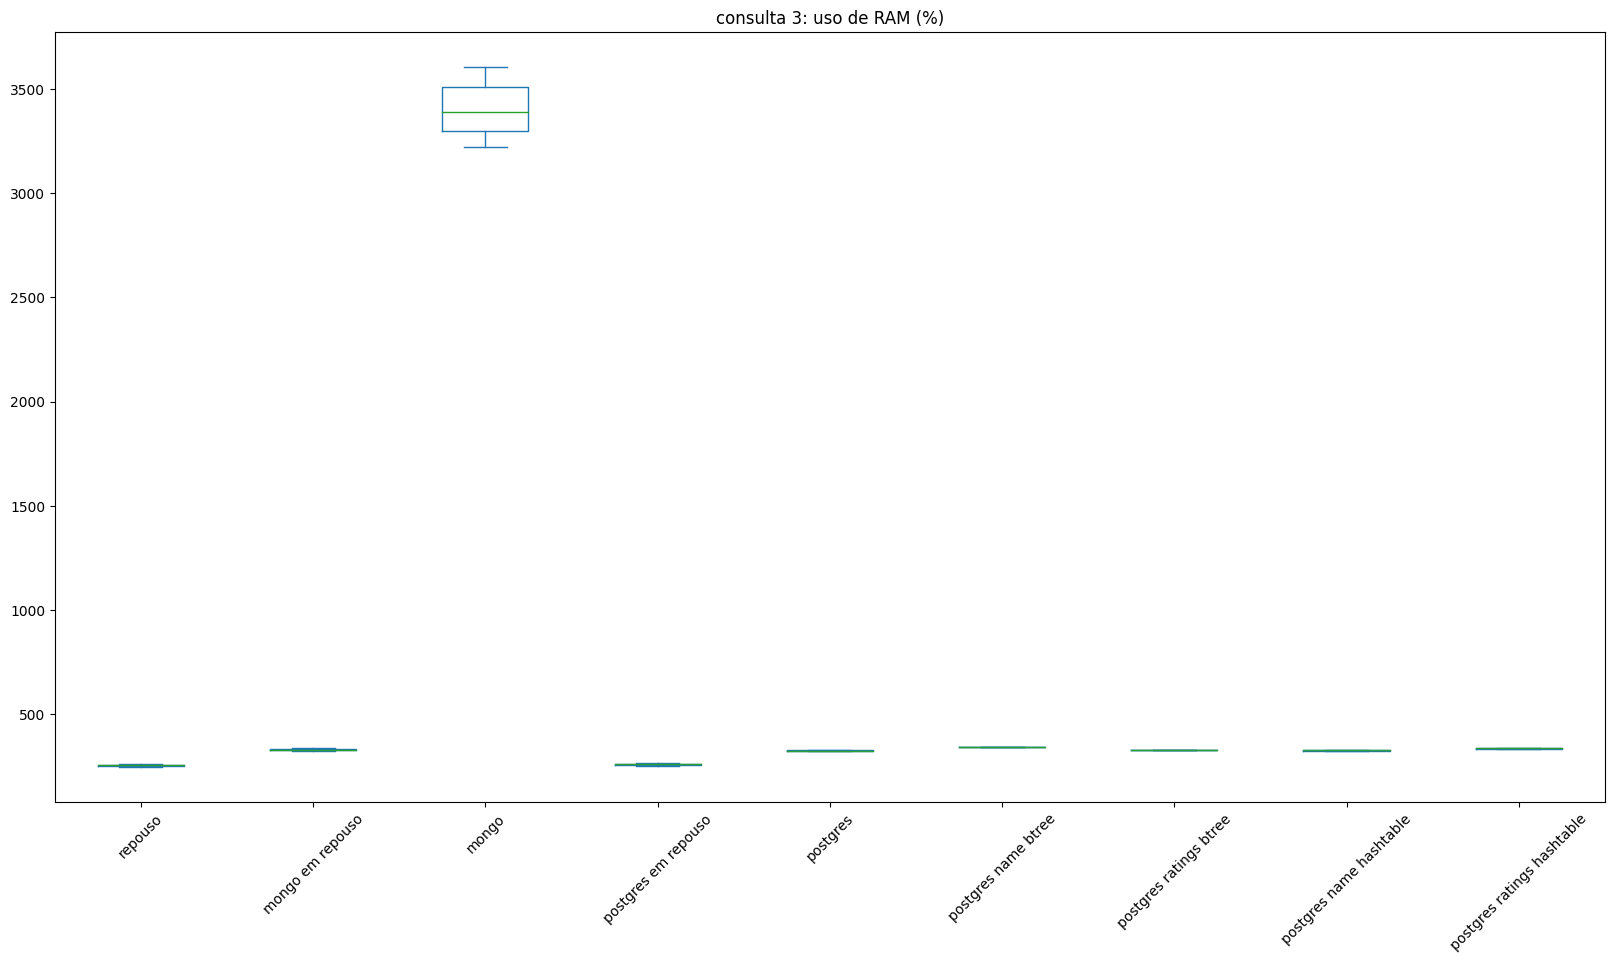

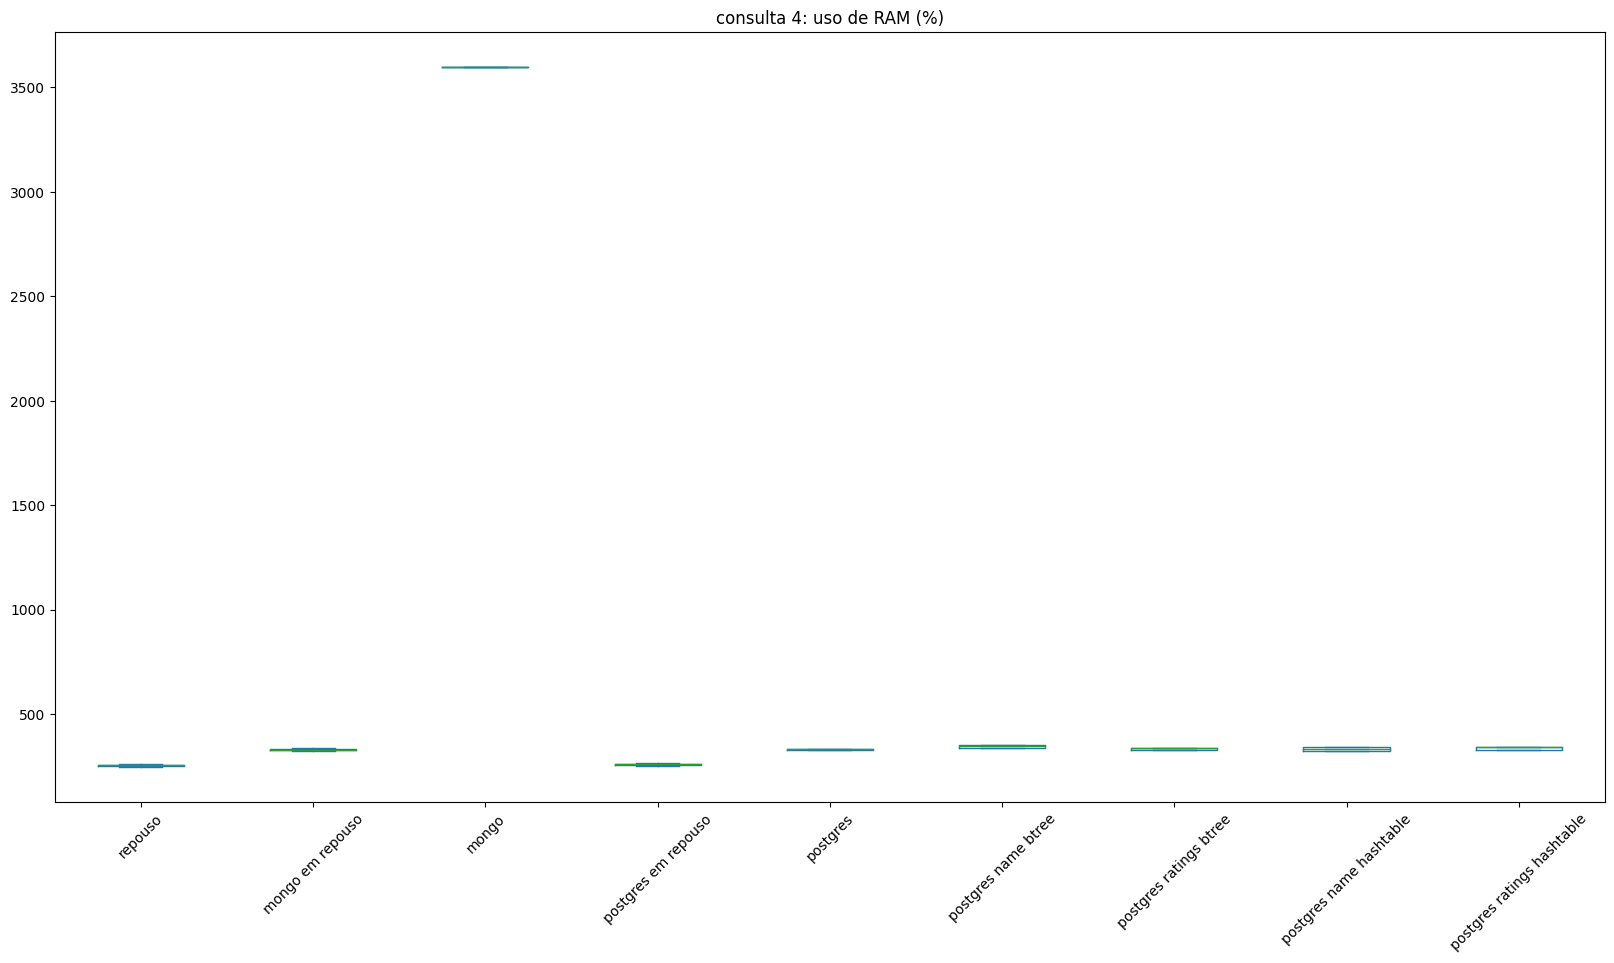

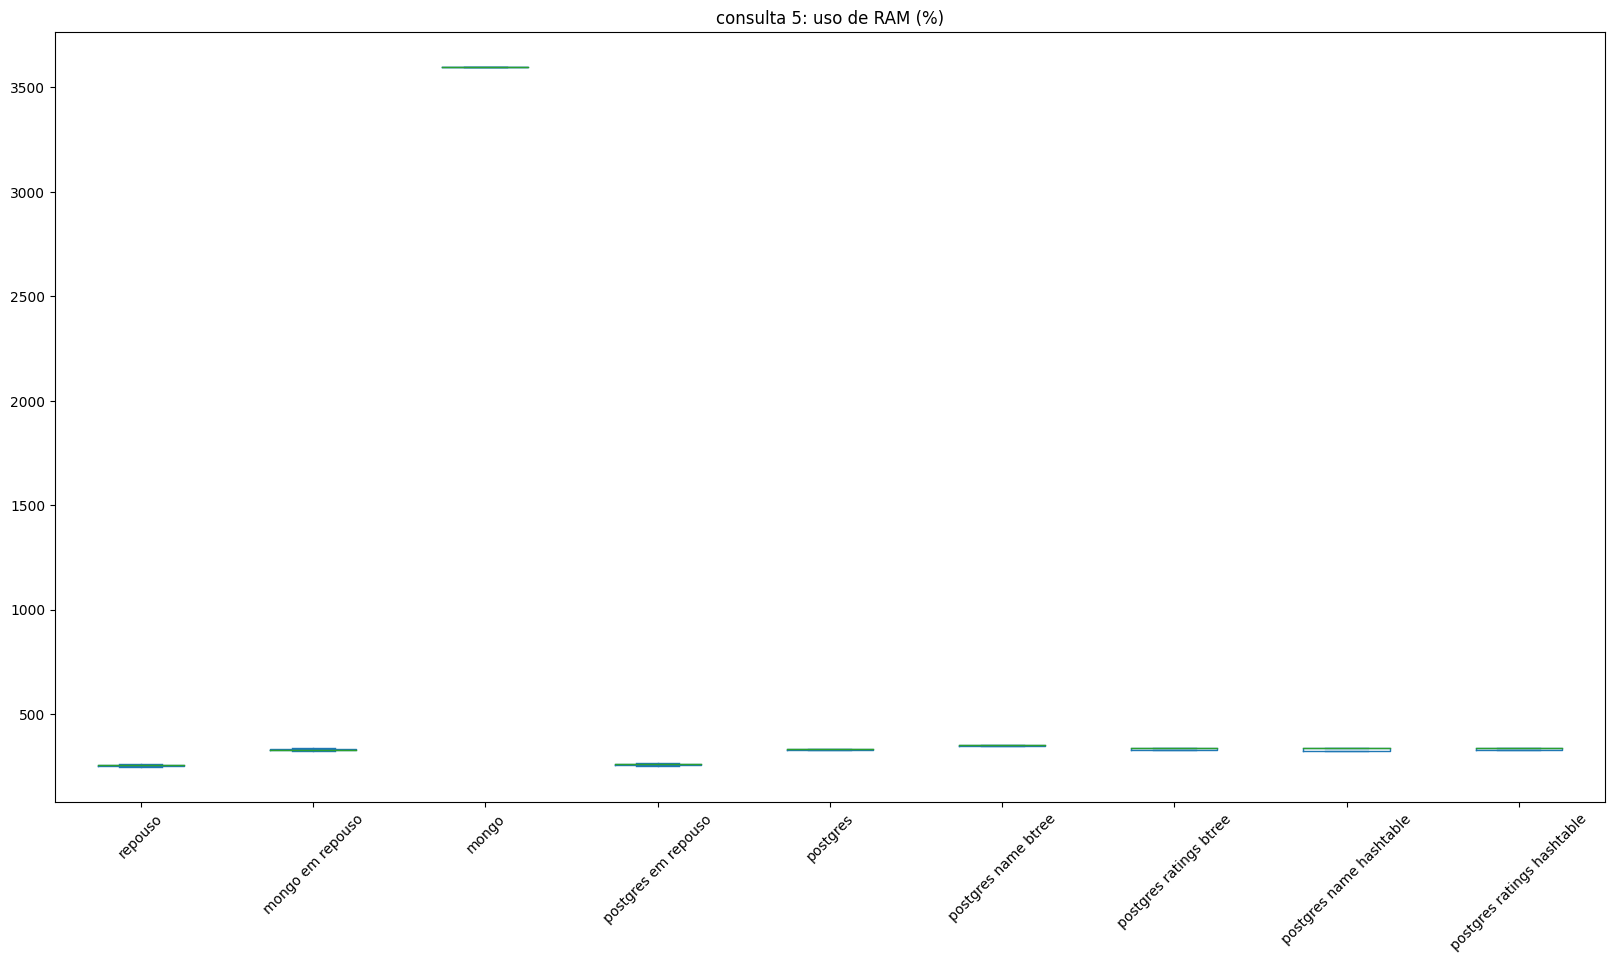

In [50]:
for i, consulta in enumerate(uso_da_maquina):
    (uso_da_maquina[i]['ram'] / 1.e6).plot.box(figsize=(20,10), showfliers=False)
    plt.xticks(rotation=45)
    plt.title(f'consulta {i}: uso de RAM (MB)')
    plt.show()

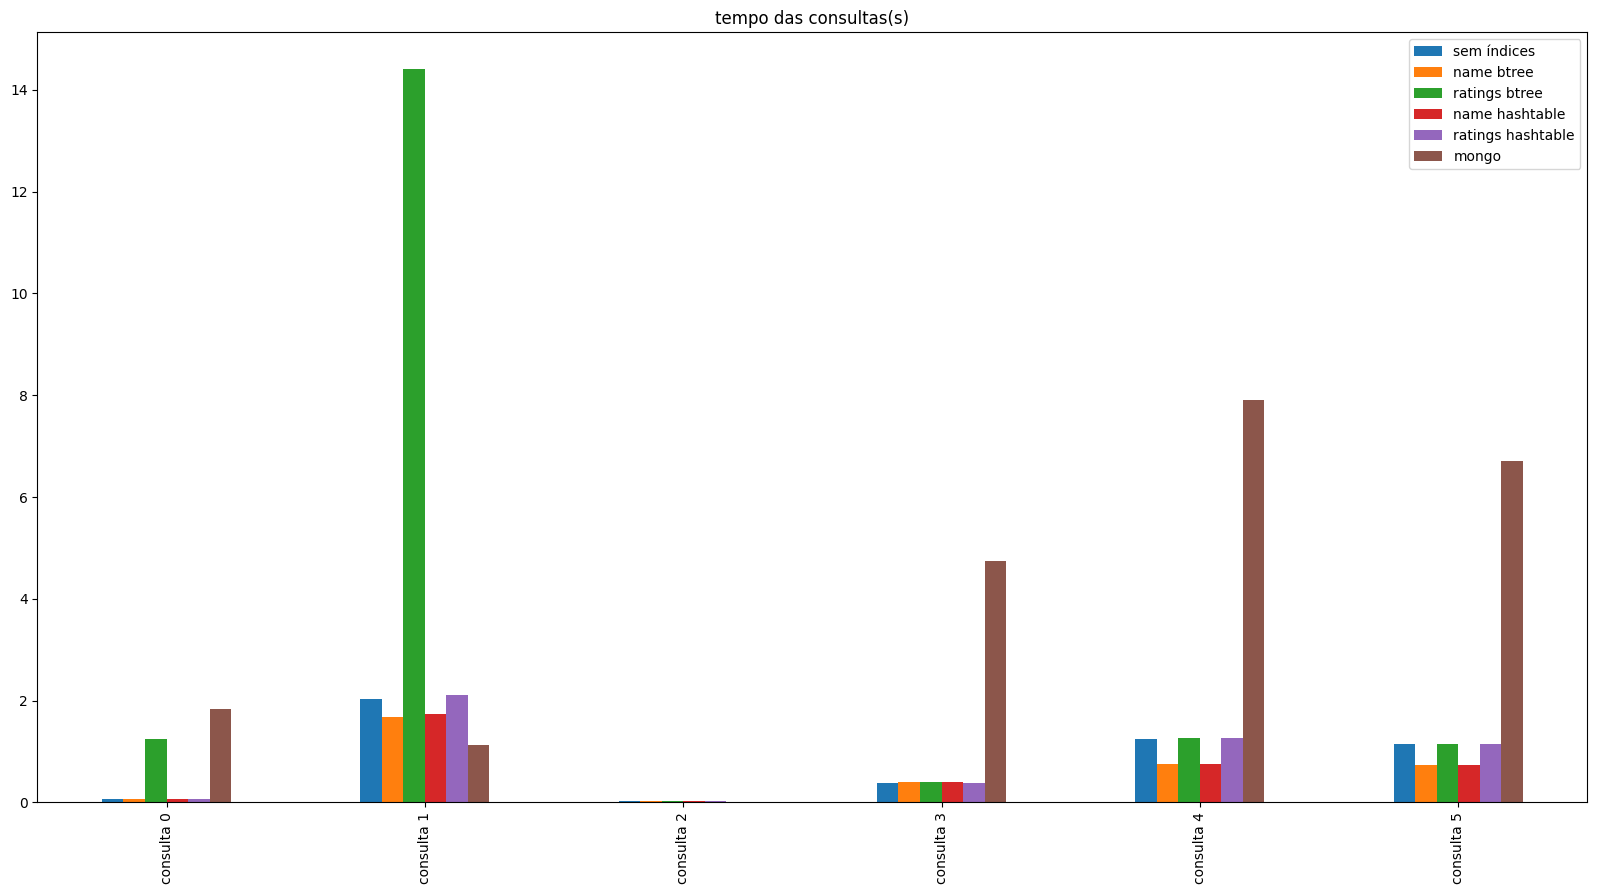

In [44]:
tempos_df = pd.DataFrame(duracoes_postgres).T
tempos_df.rename(columns={i: x for i, x in enumerate(['sem índices', 'name btree', 'ratings btree', 'name hashtable', 'ratings hashtable'])}, inplace=True)
tempos_df['mongo'] = duracao_mongo
tempos_df.rename({i: f'consulta {i}' for i in range(tempos_df.shape[0])}, inplace=True)
tempos_df.plot.bar(figsize=(20, 10), title='tempo das consultas(s)')
#plt.yscale('log')
plt.show()